# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

differentialabundance

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [13]:
from enum import unique

import pandas as pd
import numpy as np

sample_sheet = pd.read_csv('../day_02/sample_sheet_all.csv', index_col=0)
conditions = pd.read_csv('../day_02/conditions.csv', index_col=0)
sample_sheet['Treatment'] = np.where(conditions.loc[sample_sheet.index, 'condition: oxy'], 'oxy', 'Sal')
sample_sheet['Genotype'] = np.where(conditions.loc[sample_sheet.index, 'genotype: sham'], 'Sham', 'SNI')

sample_sheet['Condition'] = sample_sheet['Genotype'] + '_' + sample_sheet['Treatment']
sample_sheet['Condition_count'] = sample_sheet.groupby('Condition').cumcount() + 1
sample_sheet['sample'] = sample_sheet['Condition'] + '_' + sample_sheet['Condition_count'].astype(str)
sample_sheet.index = sample_sheet['sample']
sample_sheet = sample_sheet.drop(columns=['Condition_count'])
sample_sheet['Condition'].to_csv('sample_sheet.csv', index=True)

In [9]:
sample_sheet

,fastq_1,fastq_2,strandedness,Condition,Genotype
sample,,,,,
SRR23195516,fetch_out/fastq/SRX19144486_SRR23195516_1.fast...,fetch_out/fastq/SRX19144486_SRR23195516_2.fast...,auto,oxy,sni
SRR23195511,fetch_out/fastq/SRX19144488_SRR23195511_1.fast...,fetch_out/fastq/SRX19144488_SRR23195511_2.fast...,auto,oxy,sham
SRR23195517,NaN,NaN,auto,oxy,sni
SRR23195505,NaN,NaN,auto,sal,sni
SRR23195508,NaN,NaN,auto,oxy,sni
SRR23195519,NaN,NaN,auto,oxy,sham
SRR23195509,NaN,NaN,auto,oxy,sni
SRR23195514,NaN,NaN,auto,oxy,sham
SRR23195510,NaN,NaN,auto,sal,sni


Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

In [15]:
 !nextflow run nf-core/differentialabundance \
     --input sample_sheet.csv \
     --contrasts data/contrasts.csv \
     --matrix data/salmon.merged.gene_counts.tsv \
     --outdir differentialabundance_out  \
     -profile rnaseq,docker,arm


 N E X T F L O W   ~  version 25.04.7

Launching `https://github.com/nf-core/differentialabundance` [deadly_tuckerman] DSL2 - revision: 3dd360fed0 [master]

WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : master
  runName                     : deadly_tuckerman
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd78af_0]
  launchDir                   : /Users/patrick/Studium_Local

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

input, contrasts, and matrix specify samples, comparisons to be performed and raw data respectively.
Outdir specifies the output directory. Profile rnaseq is used with input data coming from rnaseq experiments, docker runs the pipeline in containers and arm is used to run properly on apple arm architecture.

What were the outputs of the pipeline?

Plots, tables and a report both as a shiny app as well as .html file.
Additionally pipeline info is collected.

Would you exclude any samples? If yes, which and why?

SNI_SAL4 and SNI_SAL_2, they are strong outliers in the PCA

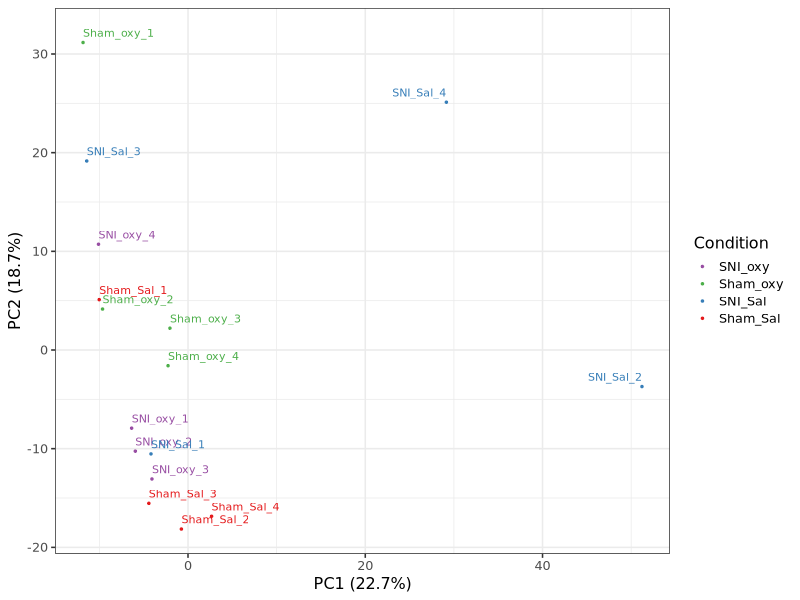

In [3]:
from IPython.display import Image

Image('differentialabundance_out/plots/exploratory/Condition/png/pca2d.png')

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

18 for SNI_oxy vs SNI_sal and 7 for sham_oxy vs sham_sal

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

NAc: nucleus accumbens, part of the reward centre and dopaminergic pathways.

mPFC: medial prefrontal cortex, involved in decision making and higher order functions of the brain.

VTA: ventral tegmental area: origin of dopaminergic pathways, involved in drug and reward processes.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

No, no list of DEGs is provided in supplementary data only final analysis.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

This is not sufficient, Gene Ontology Analysis and Ingenuity Pathway Analysis was performed to get a functional view of the diferrentially expressed genes.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentioned.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

treated_degs = set(pd.read_csv('differentialabundance_out/tables/differential/condition_control_treated.deseq2.results_filtered.tsv', sep='\t')['gene_id'])
control_degs = set(pd.read_csv('differentialabundance_out/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv', sep='\t')['gene_id'])

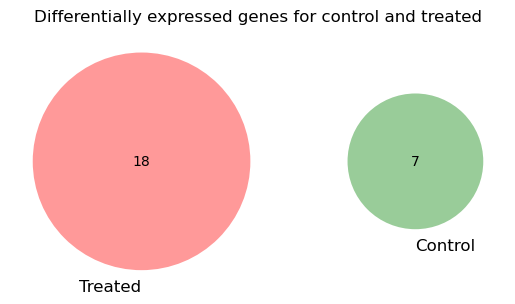

In [20]:
plt.figure()
venn2([treated_degs, control_degs], ('Treated', 'Control'))
plt.title("Differentially expressed genes for control and treated")
plt.show()